# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv(r"C:\Users\rrubel\Documents\Materials\section04\dsc-1-04-13-project-data-cleaning-online-ds-sp-000\heroes_information.csv")
powers_df = pd.read_csv(r"C:\Users\rrubel\Documents\Materials\section04\dsc-1-04-13-project-data-cleaning-online-ds-sp-000\super_hero_powers.csv")
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [3]:
heroes_df.drop(columns="Unnamed: 0", inplace=True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesnt contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [175]:
heroes_df.info()
heroes_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [176]:
pd.options.display.max_rows = 200
powers_df.info()
powers_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


hero_names                      0
Agility                         0
Accelerated Healing             0
Lantern Power Ring              0
Dimensional Awareness           0
Cold Resistance                 0
Durability                      0
Stealth                         0
Energy Absorption               0
Flight                          0
Danger Sense                    0
Underwater breathing            0
Marksmanship                    0
Weapons Master                  0
Power Augmentation              0
Animal Attributes               0
Longevity                       0
Intelligence                    0
Super Strength                  0
Cryokinesis                     0
Telepathy                       0
Energy Armor                    0
Energy Blasts                   0
Duplication                     0
Size Changing                   0
Density Control                 0
Stamina                         0
Astral Travel                   0
Audio Control                   0
Dexterity     

## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [4]:
print("There are no null values in the Powers DataFrame. In the the Heroes DataFrame, there are 15 null values in the Publisher column and 2 null values in the Weight column")
print("I am going to remove the 17 rows that contain null values because since it is a small subset of the dataset (2.3%).")

There are no null values in the Powers DataFrame. In the the Heroes DataFrame, there are 15 null values in the Publisher column and 2 null values in the Weight column
I am going to remove the 17 rows that contain null values because since it is a small subset of the dataset (2.3%).


In [5]:
heroes_df.dropna(inplace=True)
heroes_df.isna().sum()
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 0 to 733
Data columns (total 10 columns):
name          719 non-null object
Gender        719 non-null object
Eye color     719 non-null object
Race          719 non-null object
Hair color    719 non-null object
Height        719 non-null float64
Publisher     719 non-null object
Skin color    719 non-null object
Alignment     719 non-null object
Weight        719 non-null float64
dtypes: float64(2), object(8)
memory usage: 61.8+ KB


In [6]:
heroes_df.describe()
col = "Height"
outliers1 = heroes_df[heroes_df[col] > heroes_df[col].mean() + 3 * heroes_df[col].std()]
outliers2 = heroes_df[heroes_df[col] < heroes_df[col].mean() - 3 * heroes_df[col].std()]
outliers1

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
255,Fin Fang Foom,Male,red,Kakarantharaian,No Hair,975.0,Marvel Comics,green,good,18.0
272,Galactus,Male,black,Cosmic Entity,Black,876.0,Marvel Comics,-,neutral,16.0
302,Groot,Male,yellow,Flora Colossus,-,701.0,Marvel Comics,-,good,4.0


In [96]:
powers_df.describe()


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,...,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Dr Manhattan,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,637,646,548,562,659,642,554,509,360,648,575,659,520,651,612,652,378,663,660,661,666,418,659,627,609,645,657,660,595,578,606,625,623,666,602,663,644,664,601,637,...,657,624,619,666,660,634,665,646,663,656,655,659,663,661,647,660,661,645,647,660,666,648,665,664,644,633,633,645,664,656,661,652,665,648,665,661,665,659,644,644,653,651,665,658,666,666,666,665,665,665


## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider settin the the column you want to join on as the index for each DataFrame.  

In [7]:
joined_df = heroes_df.join(powers_df.set_index("hero_names"), how = "inner", on = "name")

In [8]:
pd.options.display.max_columns = 100
joined_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,...,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,True,False,False,True,True,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,False,False,False,True,False,False,False,F

In [17]:
joined_df["Race"].value_counts()

-                     242
Human                 191
Mutant                 61
God / Eternal          14
Human / Radiation      11
Cyborg                 10
Android                 9
Symbiote                8
Kryptonian              7
Alien                   7
Demon                   6
Atlantean               5
Alpha                   5
Asgardian               5
Inhuman                 4
Cosmic Entity           4
New God                 3
Human / Altered         3
Human-Kree              2
Animal                  2
Saiyan                  2
Demi-God                2
Human / Cosmic          2
Frost Giant             2
Metahuman               2
Eternal                 2
Vampire                 2
Amazon                  2
Strontian               1
Rodian                  1
Czarnian                1
Mutant / Clone          1
Human / Clone           1
Zombie                  1
Ungaran                 1
Korugaran               1
Flora Colossus          1
Neyaphem                1
Human-Vuldar

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

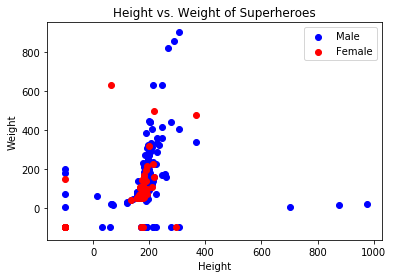

In [9]:
df_male = joined_df.loc[joined_df["Gender"] == "Male"]
df_female = joined_df.loc[joined_df["Gender"] == "Female"]
nullvals = joined_df.loc[joined_df["Gender"] == "-"]
fig = plt.figure()
plt.scatter(df_male["Height"],df_male["Weight"], color="blue")
plt.scatter(df_female["Height"],df_female["Weight"], color="red")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs. Weight of Superheroes")
plt.legend(["Male", "Female"])
plt.show()

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [10]:
import seaborn as sns
male_heroes_df = joined_df.loc[joined_df["Gender"] == "Male"]
female_heroes_df = joined_df.loc[joined_df["Gender"] == "Female"]

def show_distplot(dataframe, gender, column_name):
    y = dataframe.loc[dataframe["Gender"] == gender] 
    x = y.loc[y[column_name] > 0.0]
    return sns.distplot(x[column_name])

C:\Users\rrubel\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


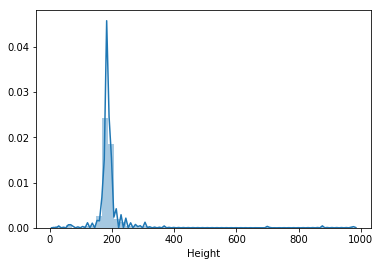

In [200]:
show_distplot(joined_df, "Male", "Height")

C:\Users\rrubel\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


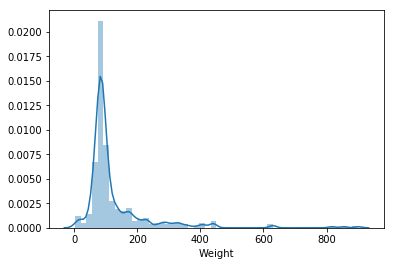

In [11]:
show_distplot(joined_df, "Male", "Weight")


C:\Users\rrubel\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


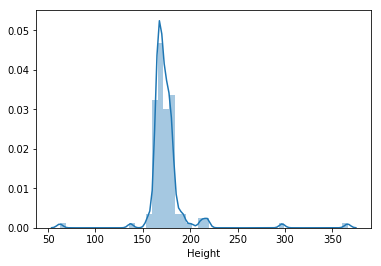

In [12]:
show_distplot(joined_df, "Female", "Height")


C:\Users\rrubel\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


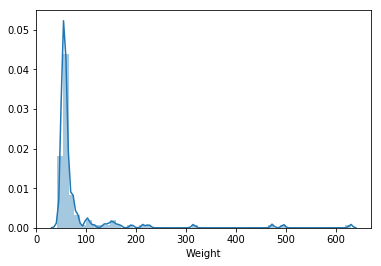

In [203]:
show_distplot(joined_df, "Female", "Weight")

Discuss your findings from the plots above, with respect to the distibution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________



In [14]:
print("After removing the -99 placeholder values, it can be seen that each of the four distributions are positively skewed. This means that the majority of the data is in a certain range, but there are outliers on the right hand-side. As a result, the means are higher than the medians. The medians are more reliable representations of the datasets.")

After removing the -99 placeholder values, it can be seen that each of the four distributions are positively skewed. This means that the majority of the data is in a certain range, but there are outliers on the right hand-side. As a result, the means are higher than the medians. The medians are more reliable representations of the datasets.


### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [221]:
joined_df.head()
powers = joined_df.select_dtypes(include=['bool']).sum(axis=0)
powers.sort_values(ascending=False).head()

Super Strength    357
Stamina           286
Durability        256
Super Speed       248
Agility           236
dtype: int64

In [223]:
marvel_df = joined_df.loc[joined_df["Publisher"] == "Marvel Comics"]
marvel_powers = marvel_df.select_dtypes(include=['bool']).sum(axis=0)
marvel_powers.sort_values(ascending=False).head()

Super Strength    204
Durability        154
Stamina           150
Super Speed       137
Agility           126
dtype: int64

In [224]:
dc_df = joined_df.loc[joined_df["Publisher"] == "DC Comics"]
dc_powers = dc_df.select_dtypes(include=['bool']).sum(axis=0)
dc_powers.sort_values(ascending=False).head()

Super Strength    109
Stamina            90
Flight             86
Super Speed        79
Agility            71
dtype: int64

In [226]:
print("Four out of the five most common powers in the overall dataset, marvel dataset, and DC dataset are the same. There is a large portion of the marvel dataset which contains the power of durability. This is also true of the overall Superhero dataset.")

Four out of the five most common powers in the overall dataset, marvel dataset, and DC dataset are the same. There is a large portion of the marvel dataset which contains the power of durability. This is also true of the overall Superhero dataset.


Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [183]:
print("What are the top five powers of mutants and top five powers of humans? Does this differ by gender? How do they compare?")

What are the top five powers of mutants and top five powers of humans? Does this differ by gender? How do they compare?


In [28]:
male_heroes_df = joined_df.loc[joined_df["Gender"] == "Male"]
female_heroes_df = joined_df.loc[joined_df["Gender"] == "Female"]
male_mut_df = male_heroes_df.loc[male_heroes_df["Race"] == "Mutant"]
female_mut_df = female_heroes_df.loc[female_heroes_df["Race"] == "Mutant"]
male_hum_df = male_heroes_df.loc[male_heroes_df["Race"] == "Human"]
female_hum_df = female_heroes_df.loc[female_heroes_df["Race"] == "Human"]

In [73]:
male_mut_powers = male_mut_df.select_dtypes(include=['bool']).sum(axis=0)
male_mut_plot = male_mut_powers.sort_values(ascending=False).head(5)

In [72]:
female_mut_powers = female_mut_df.select_dtypes(include=['bool']).sum(axis=0)
female_mut_plot = female_mut_powers.sort_values(ascending=False).head(5)

In [70]:
male_hum_powers = male_hum_df.select_dtypes(include=['bool']).sum(axis=0)
male_hum_plot = male_hum_powers.sort_values(ascending=False).head(5)

In [71]:
female_hum_powers = female_hum_df.select_dtypes(include=['bool']).sum(axis=0)
female_hum_plot = female_hum_powers.sort_values(ascending=False).head()

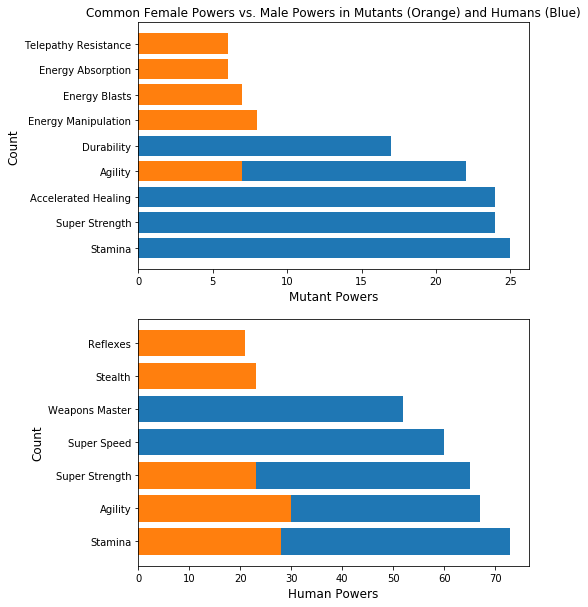

In [182]:
fig = plt.figure(figsize=(7,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.barh(male_mut_plot.index, male_mut_plot)
ax1.barh(female_mut_plot.index, female_mut_plot)
ax2.barh(male_hum_plot.index, male_hum_plot)
ax2.barh(female_hum_plot.index, female_hum_plot)
ax1.set_xlabel("Mutant Powers", size=12)
ax1.set_ylabel("Count", size=12)
ax2.set_xlabel("Human Powers", size=12)
ax2.set_ylabel("Count", size=12)
ax1.set_title("Common Female Powers vs. Male Powers in Mutants (Orange) and Humans (Blue)")
plt.show()

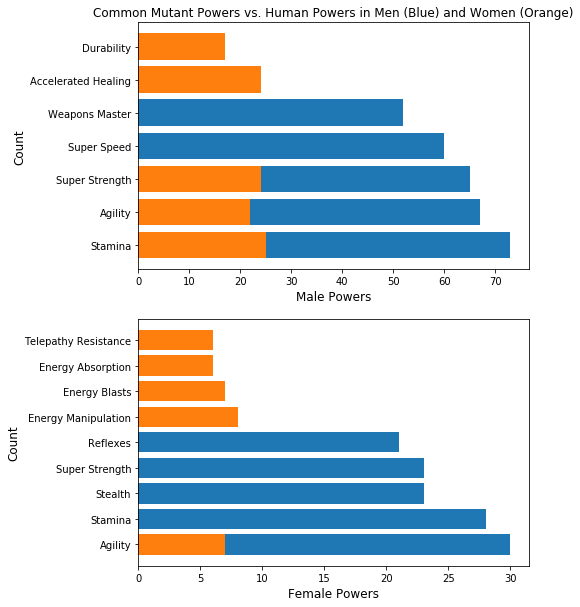

In [181]:
fig = plt.figure(figsize=(7,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.barh(male_hum_plot.index, male_hum_plot)
ax1.barh(male_mut_plot.index, male_mut_plot)
ax2.barh(female_hum_plot.index, female_hum_plot)
ax2.barh(female_mut_plot.index, female_mut_plot)
ax1.set_xlabel("Male Powers", size=12)
ax1.set_ylabel("Count", size=12)
ax2.set_xlabel("Female Powers", size=12)
ax2.set_ylabel("Count", size=12)
ax1.set_title("Common Mutant Powers vs. Human Powers in Men (Blue) and Women (Orange)")
plt.show()

In [186]:
print("The most common powers in mutant and human men have a decent amount of overlap. This is not the case for mutant and human females. The mutant race has very little overlap when separating into male and female subsets. The human race has much more overlap when you compare genders. The only power that consistently shows up in both races and genders if agility.")

The most common powers in mutant and human men have a decent amount of overlap. This is not the case for mutant and human females. The mutant race has very little overlap when separating into male and female subsets. The human race has much more overlap when you compare genders. The only power that consistently shows up in both races and genders if agility.


## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data